# 降维
主要是为了解决维度爆炸，现在原始维度上测试一下，速度太慢再考虑降维

## Projection
将高纬度数据投影到低纬度平面上，例如瑞士卷（swiss roll)的数据就不好投影

## 流行学习（Manifold Learning）
一个d维流形在n维空间弯曲（其中d＜n）

## 主成分分析（PCA）
算法首先找到第一个主成分，使得投影后方差最大，之后的需要与前面的主成元正交

过奇异值分解（SVD）来把X矩阵分解为三个矩阵U*∑*(V)T，其中(V)T矩阵的每一个列向量就是我们要找的主成分

PCA假设数据以原点为中心，因此要先减去均值再svd分解。Scikit-learn中的PCA类已经减去均值，但是如果在别的场景使用要记得先减去均值再求主成分。

### 主成元

In [1]:
import numpy as np
x1 = np.random.normal(0, 1, 100)
x2 = x1 * 1 + np.random.rand(100)
X = np.c_[x1, x2]
X_centered = X - X.mean(axis = 0)
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:, 0]
c2 = V.T[:, 1]

In [2]:
c2

array([-0.71897571,  0.6950352 ])

### 投影到d维空间
Xd=X∗Wd

In [3]:
d = 1 
#aa = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5]])
#aa[1:, :]
# np.array 下标从1开始
Wd = V.T[:, :d]
Xd = X_centered.dot(Wd)

In [4]:
Wd

array([[-0.6950352 ],
       [-0.71897571]])

In [5]:
V.T

array([[-0.6950352 , -0.71897571],
       [-0.71897571,  0.6950352 ]])

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
Xd = pca.fit_transform(X)

In [7]:
Xd

array([[-1.78866227e+00],
       [-1.28083006e+00],
       [ 1.50267368e+00],
       [-2.71908346e+00],
       [-1.00560400e+00],
       [ 2.21997553e-01],
       [ 1.27385788e+00],
       [-1.08143056e+00],
       [-1.80873693e+00],
       [-1.23173742e-01],
       [ 3.59428288e-01],
       [ 8.77438670e-01],
       [ 2.85781275e+00],
       [-1.71436271e-01],
       [ 1.23771338e+00],
       [-1.61539408e+00],
       [-1.64525960e+00],
       [ 7.07063244e-01],
       [ 5.57598160e-01],
       [ 3.21820859e-01],
       [-2.74454893e+00],
       [ 2.65433432e+00],
       [ 2.77802292e+00],
       [ 1.60010848e+00],
       [ 3.76161019e-01],
       [-1.59845573e+00],
       [-7.67231330e-01],
       [ 6.19911096e-01],
       [-1.14983208e-01],
       [ 2.75991132e-01],
       [-1.67335536e-03],
       [ 9.66049540e-02],
       [-1.07271663e-01],
       [ 8.30987064e-01],
       [ 1.45462130e+00],
       [ 6.61175035e-01],
       [-3.72193029e-01],
       [-3.85201791e-02],
       [-1.1

In [8]:
#查看主成分
print(pca.components_.T)
#显示PCA主成分比率
print("主成分方差比率为：")
print(pca.explained_variance_ratio_)

[[-0.6950352 ]
 [-0.71897571]]
主成分方差比率为：
[0.98138325]


## 使用sklearn 中PCA() 并选择合适的维度
合理的选择维数而不是随机选择一个维数，我们可以通过设置一个合适的方差比率（如95%），计算需要多少个主成分的方差比率和能达到这个比率，就选择该维度

In [9]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [10]:
X_reduced

array([[-1.78866227e+00],
       [-1.28083006e+00],
       [ 1.50267368e+00],
       [-2.71908346e+00],
       [-1.00560400e+00],
       [ 2.21997553e-01],
       [ 1.27385788e+00],
       [-1.08143056e+00],
       [-1.80873693e+00],
       [-1.23173742e-01],
       [ 3.59428288e-01],
       [ 8.77438670e-01],
       [ 2.85781275e+00],
       [-1.71436271e-01],
       [ 1.23771338e+00],
       [-1.61539408e+00],
       [-1.64525960e+00],
       [ 7.07063244e-01],
       [ 5.57598160e-01],
       [ 3.21820859e-01],
       [-2.74454893e+00],
       [ 2.65433432e+00],
       [ 2.77802292e+00],
       [ 1.60010848e+00],
       [ 3.76161019e-01],
       [-1.59845573e+00],
       [-7.67231330e-01],
       [ 6.19911096e-01],
       [-1.14983208e-01],
       [ 2.75991132e-01],
       [-1.67335536e-03],
       [ 9.66049540e-02],
       [-1.07271663e-01],
       [ 8.30987064e-01],
       [ 1.45462130e+00],
       [ 6.61175035e-01],
       [-3.72193029e-01],
       [-3.85201791e-02],
       [-1.1

In [11]:
print(pca.components_.T)

[[-0.6950352 ]
 [-0.71897571]]


## 增量PCA（IPCA）

In [12]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
from sklearn.model_selection import train_test_split
X = mnist["data"]
y = mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

In [15]:
pca.n_components_
X_reduced

array([[-7.97813563e+01, -3.67360028e+02,  8.55875831e+02, ...,
        -3.11346984e+01, -4.42566542e+01, -1.32773464e+01],
       [-3.25296441e+02,  2.51774827e+02, -6.24172033e+02, ...,
         9.51581242e+00, -1.71763938e+01, -5.60175172e+01],
       [-1.41039365e+02,  5.88074207e+02, -7.43372449e+01, ...,
         1.45348493e+01, -4.00460951e+01, -8.50692477e-01],
       ...,
       [-1.01103035e+03, -5.27674508e+02,  1.55385116e+02, ...,
        -3.34973911e+01, -4.22648815e+01,  2.90616670e+00],
       [-2.65948722e+02, -2.00212932e+02, -5.01976723e+02, ...,
         8.23142397e+01, -9.97115605e+01, -8.68158274e+00],
       [-3.03233257e+02, -2.80581851e+01,  4.15164026e+01, ...,
         2.22720365e+01, -1.00933770e+02, -5.87723847e+01]])

In [16]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [17]:
X_reduced

array([[-7.97813563e+01, -3.67360028e+02,  8.55875831e+02, ...,
         2.33776461e+01, -1.24075057e+01, -2.41157394e+01],
       [-3.25296441e+02,  2.51774827e+02, -6.24172033e+02, ...,
         6.59245437e+00,  3.38450441e+01, -6.75560235e+00],
       [-1.41039365e+02,  5.88074207e+02, -7.43372449e+01, ...,
        -1.27610577e+01,  1.88981702e+01,  1.43526714e+01],
       ...,
       [-1.01103035e+03, -5.27674507e+02,  1.55385116e+02, ...,
         2.82037635e+01, -2.82951887e+00, -4.55418649e+01],
       [-2.65948722e+02, -2.00212932e+02, -5.01976723e+02, ...,
         5.53563623e+01, -5.27718950e-01, -5.96202488e+00],
       [-3.03233257e+02, -2.80581851e+01,  4.15164027e+01, ...,
         5.57483636e+01,  3.60965844e-01,  2.51350484e+01]])

In [18]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
X_mnist_reduced = inc_pca.transform(X_train)

In [19]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_mnist_reduced)
X_reduced_inc_pca = X_mnist_reduced

In [20]:
X_reduced_pca = X_reduced
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

## 随机PCA

In [22]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced_rnd = rnd_pca.fit_transform(X_train)

## 时间复杂度

In [23]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components)
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} seconds".format(pca.__class__.__name__, t2 - t1))

n_components = 2
    PCA: 2.4 seconds
    IncrementalPCA: 12.9 seconds
    PCA: 2.4 seconds
n_components = 10
    PCA: 2.8 seconds
    IncrementalPCA: 15.4 seconds
    PCA: 2.7 seconds
n_components = 154
    PCA: 5.6 seconds
    IncrementalPCA: 21.9 seconds
    PCA: 6.0 seconds


## Kernel PCA
生成swiss roll数据可能会超内存

In [28]:
from sklearn.datasets import make_swiss_roll
X, t=make_swiss_roll(n_samples=500, noise=0, random_state=42)
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

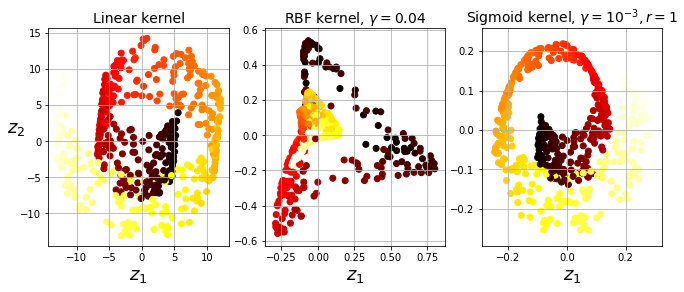

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
    
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

reg = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("reg", SVR())
])
param_grid = [{
    "reg__kernel":["linear", "rbf","sigmoid"],
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel":["linear", "rbf","sigmoid"]
}]
grid_search = GridSearchCV(reg, param_grid, cv = 3)
grid_search.fit(X, t)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('reg', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'reg__kernel': ['linear', 'rbf', 'sigmoid'], 'kpca__gamma': array([0.03   , 0.03222, 0.03444, 0.03667, 0.03889, 0.04111, 0.04333,
       0.04556, 0.04778, 0.05   ]), 'kpca__kernel': ['linear', 'rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
print(grid_search.best_params_)

{'kpca__gamma': 0.03888888888888889, 'kpca__kernel': 'linear', 'reg__kernel': 'rbf'}


In [48]:
y_pre = grid_search.predict(X)

In [50]:
from sklearn.metrics import mean_squared_error

mean_squared_error(t, y_pre)

0.9646578222144414

In [49]:
(t, y_pre)

(array([ 8.24234644, 13.67266022, 11.61126935, 10.35461227,  6.18283002,
         6.1826027 ,  5.25981413, 12.87590683, 10.37776449, 11.38581581,
         4.90639327, 13.85357398, 12.55797604,  6.71363795,  6.42604892,
         6.44093576,  7.57980457,  9.65810183,  8.78337487,  7.45715896,
        10.47896666,  6.02708764,  7.46578743,  8.16526801,  9.01074732,
        12.11249808,  6.59427004,  9.55893438, 10.29576475,  5.15017381,
        10.43836431,  6.31954098,  5.3254858 , 13.65542448, 13.81325648,
        12.33135449,  7.58330612,  5.63292697, 11.16113333,  8.8607285 ,
         5.86257225,  9.37932141,  5.03649316, 13.28253187,  7.15133285,
        10.9565144 ,  7.65019666,  9.6139146 ,  9.86501197,  6.45460118,
        13.85050881, 12.01784373, 13.5669579 , 13.14593807, 10.34746352,
        13.40084895,  5.54641116,  6.55948394,  5.13864614,  7.77855511,
         8.37558613,  7.26979335, 12.52305599,  8.07470987,  7.36013436,
         9.82717906,  6.04056851, 12.2729174 ,  5.4

## LLE局部线性嵌入（Locally Linear Embedding）
基于流行学习而不是投影。LLE首先测量每个训练样例到其最近的邻居（CN）的线性关系，然后寻找一个低维表示使得这种相关性保持得最好

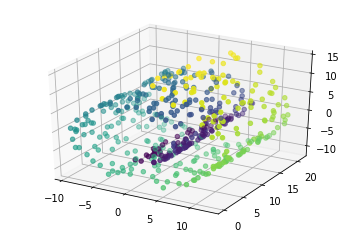

In [51]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2],c=t)
plt.show()

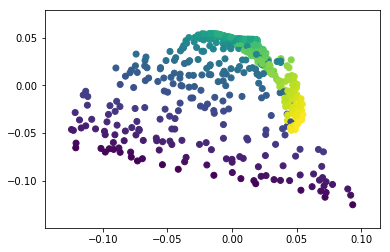

In [52]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

X_reduced = lle.fit_transform(X)
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=t)

## 其他方法
Multidimensional Scaling (MDS)降维的同时保留样本之间的距离
Isomap通过连接每个样本和它的最近邻居来创建一个图
t-Distributed Stochastic Neighbor Embedding (t-SNE)，减少维度的同时试图保持相似的样本靠近和不同的样本分离。
inear Discriminant Analysis (LDA)，是一种分类算法，但是在训练定义了一个超平面来投影数据。